## ANALYSIS FROM THE DATA UPDATED OF CRIMINALITY IN THE CITY OF CHICAGO FROM 2001 TO SEPTEMBER 2023:


In [3]:
import pandas as pd
import seaborn as sns
import mysql.connector
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [11]:
with open('config_db.json') as config_json:
    config = json.load(config_json)

conx = mysql.connector.connect(**config) 

### Amount of crimes per District:

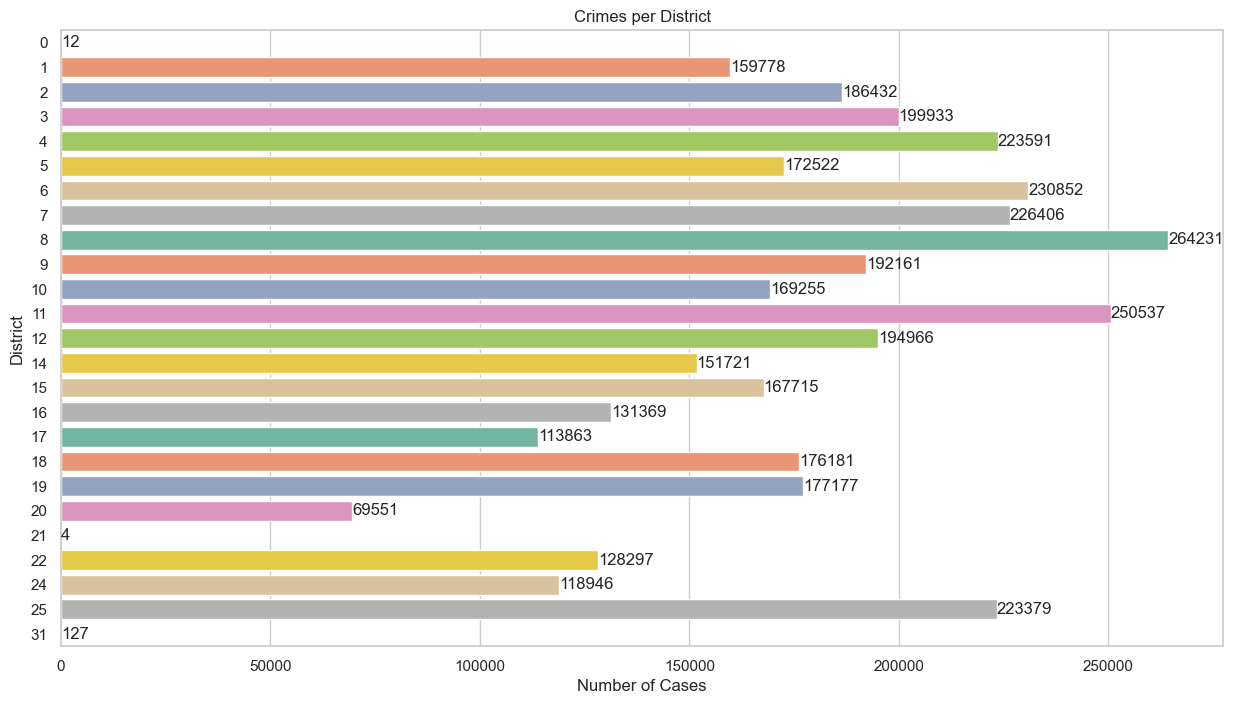

In [6]:
mycursor = conx.cursor()

crimes_by_dist = "select count(id) as crimes_count, district from crimes group by district order by district asc"
mycursor.execute(crimes_by_dist)

results = mycursor.fetchall()

mycursor.close()

crimes_per_district_df = pd.DataFrame(results, columns=['count', 'district'])


sns.set(style="whitegrid")


plt.figure(figsize=(15, 8))
ax = sns.barplot(x='count', y='district', data=crimes_per_district_df, palette="Set2", orient="h")


plt.xlabel('Number of Cases')
plt.ylabel('District')
plt.title('Crimes per District')

for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.show()


#### In this subset, during the 23 years, the district with the highest number of criminal cases was district 8 with 264231 counts of crimes, and the minimum that we have registered was district 21 with 4 crimes only.  Note that district 0 is nonexistent, and this is the value we used to manage null values for this column.

## Top 10 most common crimes:

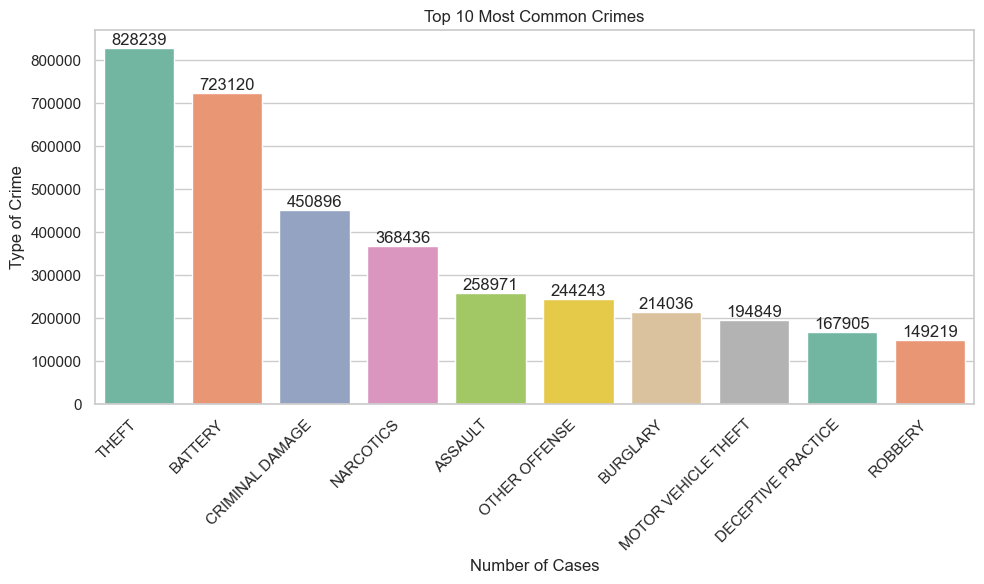

In [7]:
mycursor = conx.cursor()

top_10_crimes_query = """
SELECT i.primary_description, COUNT(c.id) AS count
FROM crimes AS c
JOIN codes AS i ON c.iucr = i.iucr
GROUP BY i.primary_description
ORDER BY count DESC
LIMIT 10;
"""

mycursor.execute(top_10_crimes_query)

results = mycursor.fetchall()

mycursor.close()

top_10_crimes_df = pd.DataFrame(results, columns=['type', 'count'])


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='type', y='count', data=top_10_crimes_df, palette="Set2")


plt.xlabel('Number of Cases')
plt.ylabel('Type of Crime')
plt.title('Top 10 Most Common Crimes')


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

#### The most committed crime in the city of Chicago from 2001 to 2023 was theft, with 828239 cases; the least committed crime from the top 10 was robbery, with 149219. The difference between theft and robbery is that in the second one, force is used.

## Amount of Crimes during the pandemic vs other near years:

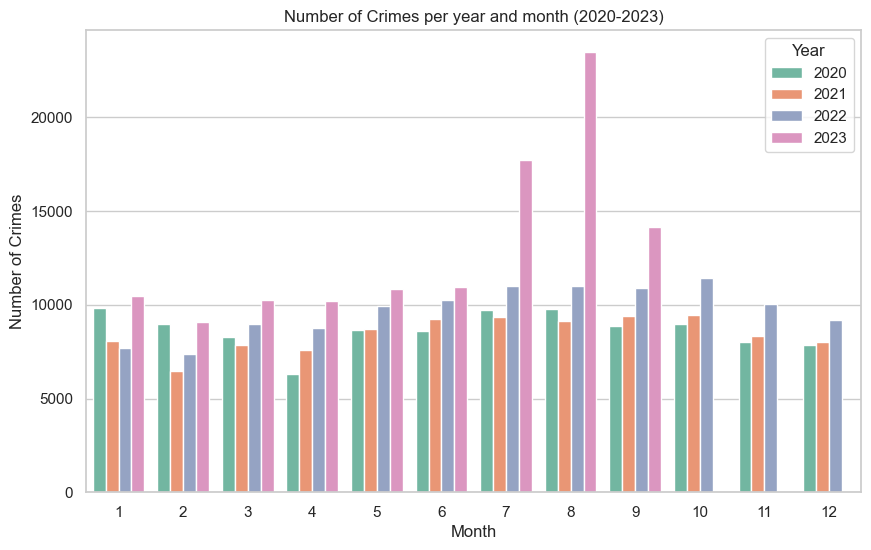

In [8]:
mycursor = conx.cursor()

years_query= """SELECT
    year,
    month,
    COUNT(*) AS count
FROM (
    SELECT
        EXTRACT(YEAR FROM date) AS year,
        EXTRACT(MONTH FROM date) AS month
    FROM crimes
    WHERE EXTRACT(YEAR FROM date) IN (2020, 2021, 2022, 2023)
) AS subquery
GROUP BY year, month
ORDER BY year, month;"""


mycursor.execute(years_query)

results = mycursor.fetchall()

mycursor.close()

crimes_per_year = pd.DataFrame(results, columns=['year', 'month', 'count'])


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(data=crimes_per_year, x="month", y="count", hue="year", palette="Set2")


plt.title('Number of Crimes per year and month (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Year')

plt.show()






## Top 10 days with more cases (table):

In [13]:
mycursor = conx.cursor()

query = """
SELECT date, COUNT(*) as case_count
FROM crimes
GROUP BY date
ORDER BY case_count DESC
LIMIT 10;
"""


df_top_10_days = pd.read_sql(query, conx)


df_top_10_days


,date,case_count
0,2020-05-31,992
1,2003-01-01,893
2,2023-08-04,883
3,2003-10-17,883
4,2001-11-01,882
5,2007-01-01,875
6,2002-10-01,871
7,2002-06-01,859
8,2001-01-01,856
9,2023-08-01,844


                         location    count
0                          STREET  1029561
1                       RESIDENCE   650488
2                       APARTMENT   449317
3                        SIDEWALK   367173
4                           OTHER   132382
5  PARKING LOT/GARAGE(NON.RESID.)   101034
6                           ALLEY    87443
7              SMALL RETAIL STORE    75419
8        SCHOOL, PUBLIC, BUILDING    72697
9                RESIDENCE-GARAGE    67614


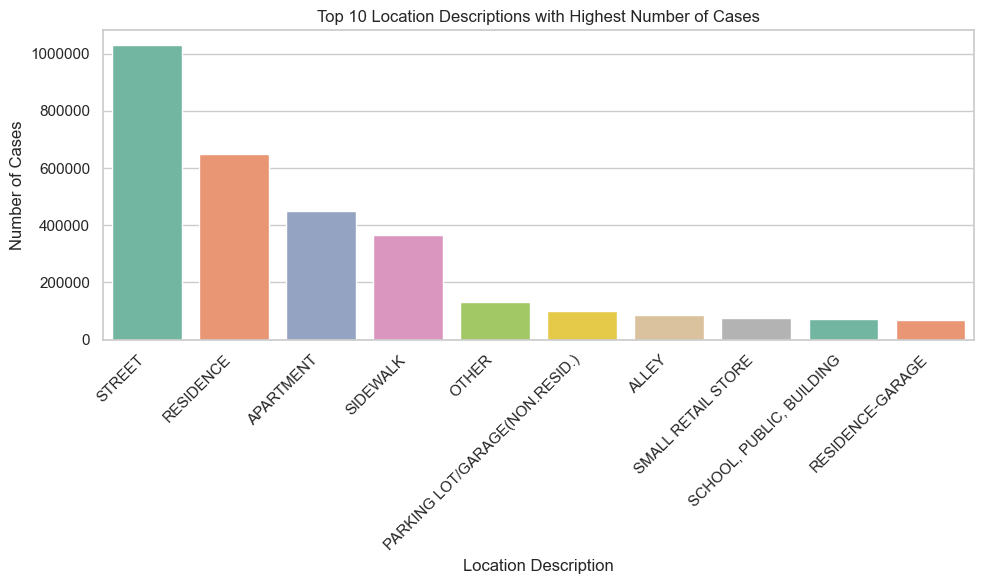

In [18]:
mycursor = conx.cursor()

query = """
SELECT location_desc, COUNT(*) as case_count
FROM crimes
GROUP BY location_desc
ORDER BY case_count DESC
LIMIT 10;
"""
mycursor.execute(query)

results = mycursor.fetchall()

mycursor.close()

crimes_per_location = pd.DataFrame(results, columns=['location', 'count'])

print(crimes_per_location)

# Configurar el estilo de la paleta de colores
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=crimes_per_location, x="location", y="count", palette="Set2")

plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

# Configurar etiquetas y título
plt.xlabel('Location Description')
plt.ylabel('Number of Cases')
plt.title('Top 10 Location Descriptions with Highest Number of Cases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()